In [21]:
import tensorflow as tf
import numpy 
import matplotlib.pyplot as plt
rng=numpy.random

In [22]:
#prarameters
learning_rate=0.01
training_epochs=1000
display_step=50

In [24]:
#trainning data
train_X=numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,7.042,10.792,5.313,7.997,5.654,9.27,3.1])
train_Y=numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples=train_X.shape[0]

In [25]:
#tf Graph input
X=tf.placeholder("float")
Y=tf.placeholder("float")

#set model weights
W=tf.Variable(rng.randn(),name="weight")
b=tf.Variable(rng.randn(),name="bias")

In [26]:
#construct a linear model
pred=tf.add(tf.multiply(X,W),b)

In [28]:
cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
#gradient descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [29]:
#initialize the variables (i.e. assign their default value)
init =tf.global_variables_initializer()

Epoch: 0050 cost= 0.077660300 W= 0.26425663 b= 0.69595164
Epoch: 0100 cost= 0.077581882 W= 0.26338372 b= 0.70223117
Epoch: 0150 cost= 0.077512614 W= 0.2625628 b= 0.7081367
Epoch: 0200 cost= 0.077451363 W= 0.26179066 b= 0.7136916
Epoch: 0250 cost= 0.077397279 W= 0.26106453 b= 0.71891576
Epoch: 0300 cost= 0.077349484 W= 0.26038152 b= 0.7238295
Epoch: 0350 cost= 0.077307269 W= 0.259739 b= 0.72845143
Epoch: 0400 cost= 0.077269971 W= 0.25913486 b= 0.7327979
Epoch: 0450 cost= 0.077237025 W= 0.25856656 b= 0.73688626
Epoch: 0500 cost= 0.077207945 W= 0.258032 b= 0.7407319
Epoch: 0550 cost= 0.077182248 W= 0.25752932 b= 0.7443482
Epoch: 0600 cost= 0.077159561 W= 0.25705647 b= 0.74775034
Epoch: 0650 cost= 0.077139549 W= 0.2566118 b= 0.7509489
Epoch: 0700 cost= 0.077121876 W= 0.2561934 b= 0.75395864
Epoch: 0750 cost= 0.077106282 W= 0.2558001 b= 0.756788
Epoch: 0800 cost= 0.077092521 W= 0.25543007 b= 0.7594501
Epoch: 0850 cost= 0.077080362 W= 0.25508213 b= 0.76195323
Epoch: 0900 cost= 0.077069655 W=

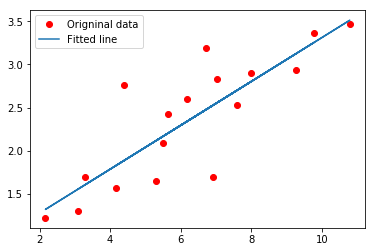

In [31]:
#start trainning 
with tf.Session() as sess:
    sess.run(init)
    
    #fit all trainning data
    for epoch  in range(training_epochs):
        for (x,y) in zip(train_X,train_Y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
         #display logs per epoch step   
        if (epoch+1)%display_step==0:
            c=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
            print ("Epoch:",'%04d'%(epoch+1),"cost=","{:.9f}".format(c),"W=",sess.run(W),"b=",sess.run(b))
#              print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
#                 "W=", sess.run(W), "b=", sess.run(b)
    print ("OPtimization Finished!")
    training_cost=sess.run(cost,feed_dict={X:train_X,Y:train_Y})
    print ("Training cost=",training_cost,"W=",sess.run(W),"b=",sess.run(b),'\n')
    
    #graphic display 
    plt.plot(train_X,train_Y,'ro',label='Original data')
    plt.plot(train_X,sess.run(W)*train_X+sess.run(b),label='Fitted line')
    plt.legend()
    plt.show()